### Run tests for warped p-variation

In [1]:
# !python tests.py

In [1]:
import sys
sys.path.insert(0, '../backend')
sys.path.insert(0, '../../data')

### Import libraries

In [2]:
import numpy as np
import pandas as pd
import time
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from generalized_dtw import Warp
from pvar_backend import *
from brute_force_warped_pvar import *
from pvar_tools import *

from transformers import *

In [16]:
import sys, importlib
importlib.reload(sys.modules['brute_force_warped_pvar'])

<module 'brute_force_warped_pvar' from '../backend\\brute_force_warped_pvar.py'>

# Example with simple signature p-variation

In [4]:
path = np.array([0.0, 1.0, 2.0, 1.0, 0.0, 1.0, 0.0, -1.0, 0.0])
path = AddTime().fit_transform([path])[0]

In [5]:
p_variation_path(path=path, p=1.5, depth=3, norm='l1')

(18.609853858712462, [0, 2, 4, 5, 7, 8])

In [6]:
p_variation_path_optim(path=path, p=1.5, depth=3, norm='l1')

(18.609853858712462, [0, 2, 4, 5, 7, 8])

# Example with signature p-variation distance

### We assume that $path_1$ and $path_2$ have already been aligned according to a warp

In [7]:
path1 = np.array([0.0, 1.0, 2.0, 1.0, 0.0, 1.0, 0.0, -1.0, 0.0, 6.43, 1.32, 23.1])
path2 = np.array([3.0, 1.0, 0.0, 2.0, 4.0, -1.0, 1.0, 3.0, -2.0, 4.21, 0.001, 10.])

path1 = AddTime().fit_transform([path1])[0]
path2 = AddTime().fit_transform([path2])[0]

In [8]:
d = p_variation_distance(path1, path2, p=1.5, depth=2, norm='l1')
d_optim = p_variation_distance_optim(path1, path2, p=1.5, depth=2, norm='l1')

print('distance with dynamic programming: {}'.format(d))
print('distance with optimisation algo: {}'.format(d_optim))

distance with dynamic programming: (296.9716167253778, [0, 2, 4, 5, 7, 11])
distance with optimisation algo: (296.9716167253778, [0, 2, 4, 5, 7, 11])


# Example with warped p-var package

In [9]:
path1 = np.array([0.0, 1.0, 2.0, 1.0, 4.0])
path2 = np.array([-3.0, 1.0, 0.0, 4.0, 2.0, 1.0])

path1 = AddTime().fit_transform([path1])[0]
path2 = AddTime().fit_transform([path2])[0]

### Compute the warped signature p-variation distance between $path_1$ and $path_2$

### 1) Sequential calculations

In [10]:
LP_seq = BruteForceWarpedPvar(path1, path2, p=1.5, depth=2, norm='l1', augment=False, add_time=False, parallelise=False)

number of warping paths to explore: 126
time to find all possible paths: 0.05


Loop over all warps: 100%|██████████████████████████████████████████████████████████| 680/680 [00:02<00:00, 311.39it/s]


total time for brute force with DP sequentially: 2.20 s


### check output along one single warp

In [11]:
# example 1
warp = LP_seq.allPaths[3]

print(LP_seq.single_warped_pvar(warp=warp, p=1.5, depth=2, norm='l1'))
print(LP_seq.optim_single_warped_pvar(warp=warp, p=1.5, depth=2, norm='l1'))

(43.8798169977704, [0, 2, 6, 7, 9])
(43.74229167233559, [0, 2, 3, 6, 7, 9])


In [12]:
# example 2
warp = LP_seq.allPaths[7]

print(LP_seq.single_warped_pvar(warp=warp, p=1.5, depth=2, norm='l1'))
print(LP_seq.optim_single_warped_pvar(warp=warp, p=1.5, depth=2, norm='l1'))

(41.392522226814705, [0, 2, 6, 7, 9])
(41.250915020726076, [0, 2, 3, 6, 7, 8, 9])


### global answer

In [13]:
print('warping distance with dynamic programming: {} along {}'.format(LP_seq.warped_pvar, LP_seq.best_warp))
# print('warping distance with optimisation algo: {} along {}'.format(LP_seq.optim_warped_pvar, LP_seq.optim_best_warp))

warping distance with dynamic programming: 25.07518748871494 along [(0, 0), (0, 1), (1, 1), (2, 1), (3, 1), (3, 2), (4, 3), (4, 4), (4, 5), (4, 5)]


### 2) Computations in parallel

In [17]:
LP = BruteForceWarpedPvar(path1, path2, p=1.5, depth=2, norm='l1', augment=False, add_time=False, parallelise=True)

number of warping paths to explore: 126
time to find all possible paths: 0.02
Using all available cores, i.e. 4
total time for brute force with DP in Parallel: 2.60 s


In [20]:
print('warping distance with dynamic programming: {}'.format(LP.warped_pvar))
# print('warping distance with optimisation algo: {}'.format(LP.optim_warped_pvar))

warping distance with dynamic programming: 25.07518748871494


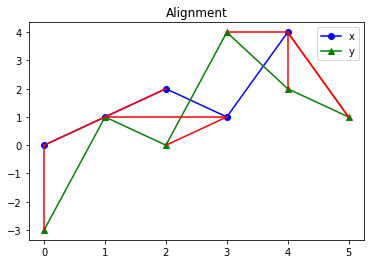

In [21]:
LP.plot_alignment()